In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas 
import seaborn as sns 
import numpy as np 

plt.style.use('ggplot')

In [3]:
from sklearn import ensemble, decomposition, preprocessing, manifold, pipeline, linear_model

In [4]:
t = pandas.read_csv('../data_set/bglb_data_set.csv', index_col='mutant_name')
t.kcat = t.kcat.map(lambda x: np.log10(x/880) or 0)
t.km = t.km.map(lambda x: np.log10(x/5) or 0)
t.kcatkm = t.kcatkm.map(lambda x: np.log10(x/174000) or 0)
t.drop([col for col in t if 'Un' in col], axis=1, inplace=True)
t = t.replace([np.inf, -np.inf], 0)
print(t.shape)
t.head()

(111, 3)


,kcat,km,kcatkm
mutant_name,,,
S14A,-0.439333,0.217484,-0.651460
T15A,-0.156314,0.025306,-0.176657
S16A,-0.756962,0.447468,-1.199275
S17A,-0.016087,0.567026,-0.577999
S17E,-0.137625,0.165541,-0.298065


In [5]:
t.query('kcat==0')

,kcat,km,kcatkm
mutant_name,,,
BglB,0.0,0.0,0.0


In [6]:
targets = 'kcat km kcatkm'.split()

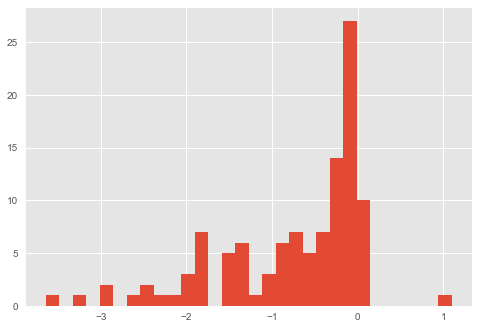

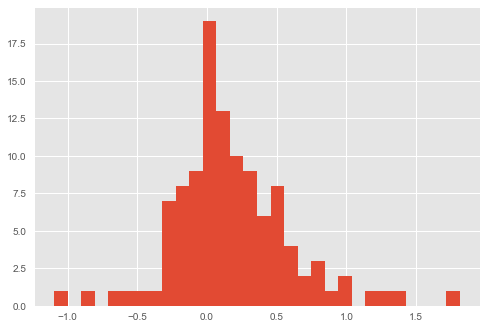

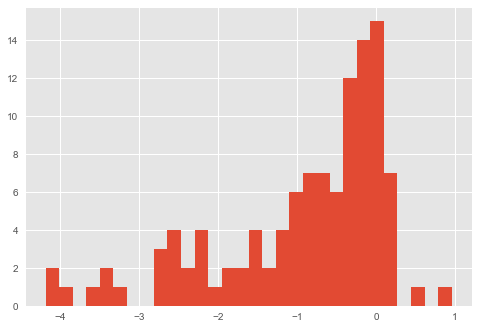

In [7]:
for target in targets:
    plt.hist(t[target], bins=30)
    plt.show()

In [8]:
# so we want to predict the price of the house ... 

In [25]:
# let's add the identity of the native and the designed residue as features 
# f1 = one_hot_encode(n[-1]) for n in df.index 

In [9]:
desired_features = [
'total_score',
'fa_rep',
'hbond_sc',
'tot_pstat_pm',
'tot_nlpstat_pm',
'tot_burunsat_pm',
'tot_hbond_pm',
'tot_NLconts_pm',
'tot_nlsurfaceE_pm',
# 'tot_total_charge',
# 'tot_total_pos_charges',
# 'tot_total_neg_charges',
# 'tot_seq_recovery',
'SR_1_total_score',
'SR_1_fa_rep',
'SR_1_hbond_sc',
'SR_1_hbond_pm',
'SR_1_burunsat_pm',
'SR_1_pstat_pm',
'SR_1_nlpstat_pm',
'SR_2_total_score',
'SR_2_fa_rep',
'SR_2_hbond_sc',
'SR_2_hbond_pm',
'SR_2_burunsat_pm',
'SR_2_pstat_pm',
'SR_2_nlpstat_pm',
'SR_3_total_score',
'SR_3_fa_rep',
'SR_3_hbond_sc',
'SR_3_hbond_pm',
'SR_3_burunsat_pm',
'SR_3_pstat_pm',
'SR_3_nlpstat_pm',
'SR_4_total_score',
'SR_4_fa_rep',
'SR_4_hbond_sc',
'SR_4_hbond_pm',
'SR_4_burunsat_pm',
'SR_4_pstat_pm',
'SR_4_nlpstat_pm',
'SR_5_total_score',
'SR_5_fa_rep',
'SR_5_hbond_sc',
'SR_5_interf_E_1_2',
'SR_5_dsasa_1_2',
'SR_5_hbond_pm',
'SR_5_burunsat_pm']

In [10]:
f = pandas.read_hdf('../rosetta_runs/bglb/enzyme_design/features__enzyme_design.h5')
scaler = preprocessing.MinMaxScaler()
f = pandas.DataFrame(scaler.fit_transform(f), columns=f.columns, index=f.index)[desired_features]
print(f.shape)
f.head()

(7967, 44)


,total_score,fa_rep,hbond_sc,tot_pstat_pm,tot_nlpstat_pm,tot_burunsat_pm,tot_hbond_pm,tot_NLconts_pm,tot_nlsurfaceE_pm,SR_1_total_score,...,SR_4_burunsat_pm,SR_4_pstat_pm,SR_4_nlpstat_pm,SR_5_total_score,SR_5_fa_rep,SR_5_hbond_sc,SR_5_interf_E_1_2,SR_5_dsasa_1_2,SR_5_hbond_pm,SR_5_burunsat_pm
N1A,0.006229,0.014184,0.159848,0.717391,0.736842,0.301255,0.843750,0.794312,0.292818,0.235720,...,0.0,0.771208,0.786842,0.123916,0.039585,0.232852,0.123666,0.333333,0.821918,0.0
N1C,0.007058,0.013888,0.186161,0.695652,0.736842,0.301255,0.823295,0.812595,0.227048,0.217806,...,0.0,0.591260,0.576316,0.094489,0.041117,0.246089,0.094323,0.300000,0.780822,0.0
N1D,0.006520,0.014017,0.168619,0.565217,0.605263,0.351464,0.802841,0.830879,0.219398,0.210096,...,0.0,0.766067,0.731579,0.131315,0.042394,0.228941,0.131150,0.326667,0.712329,0.0
N1E,0.013153,0.013917,0.145495,0.434783,0.526316,0.297071,0.864205,0.798883,0.248766,0.221548,...,0.0,0.722365,0.810526,0.096020,0.041798,0.173285,0.096066,0.333333,0.794521,0.0
N1F,0.007265,0.013679,0.128697,0.543478,0.578947,0.326360,0.838636,0.821737,0.297384,0.222681,...,0.0,0.956298,0.855263,0.096275,0.032604,0.213598,0.096321,0.353333,0.794521,0.0


In [11]:
df = t.join(f).dropna()
df.shape

(106, 47)

In [17]:
unlabeled = [n for n in f.index if n not in df.index]
U = f.loc[unlabeled]
U.shape

(7866, 44)

In [20]:
pos = set([n[1:-1] for n in df.index ])
unlabeled_known_pos = [n for n in f.index if n[1:-1] in pos]
U_known_pos = f.loc[unlabeled_known_pos]
U_known_pos.shape

(1065, 44)

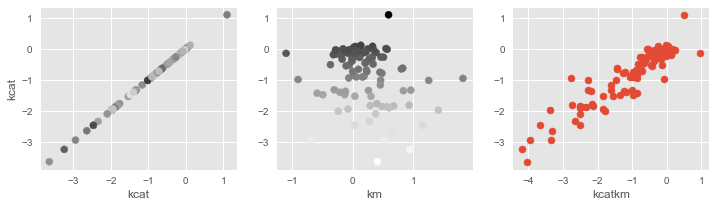

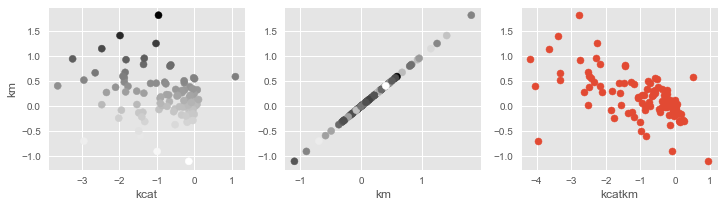

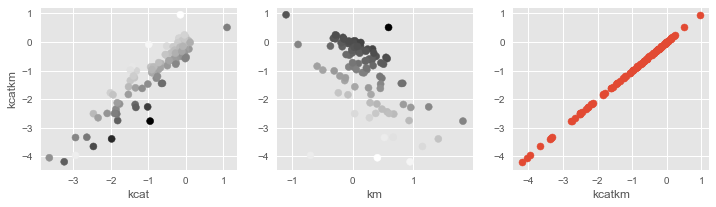

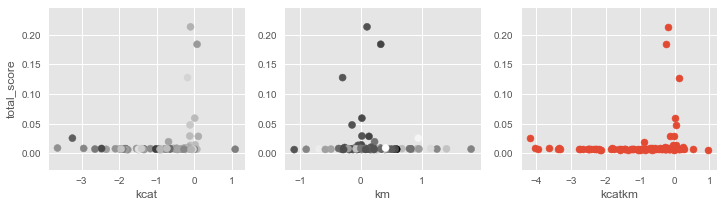

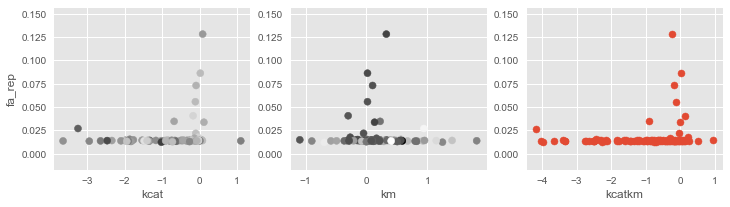

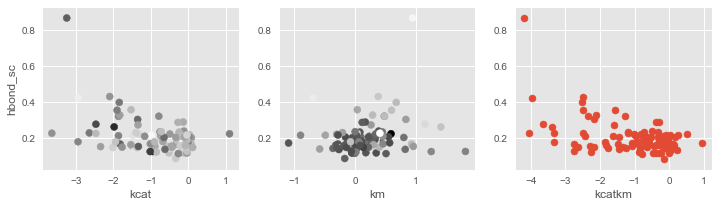

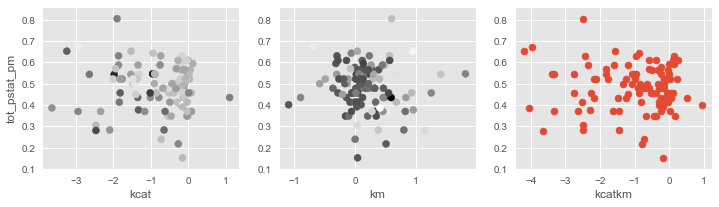

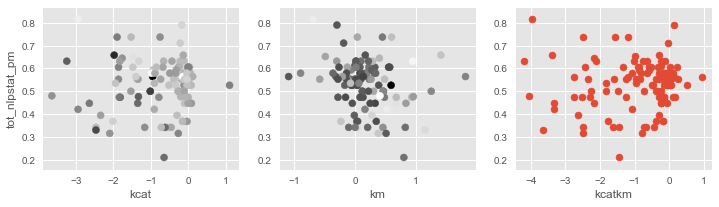

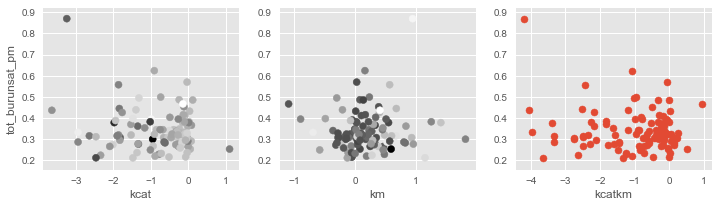

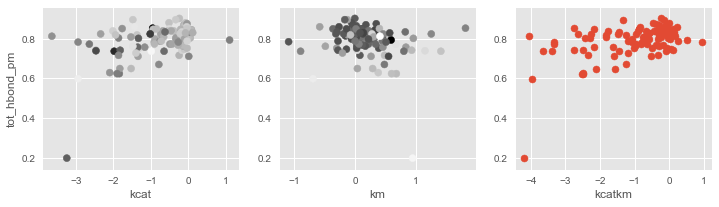

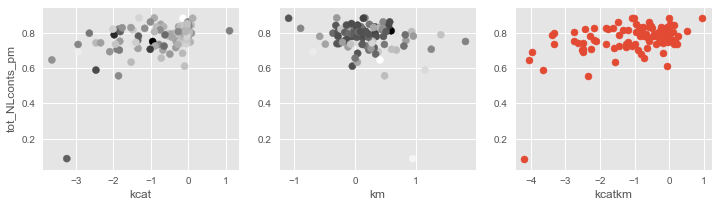

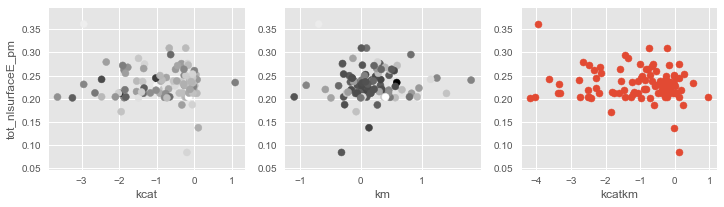

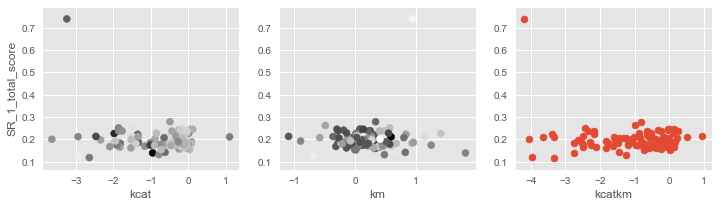

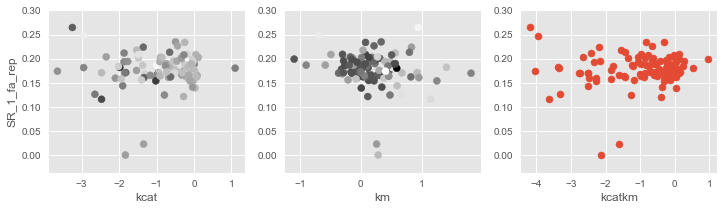

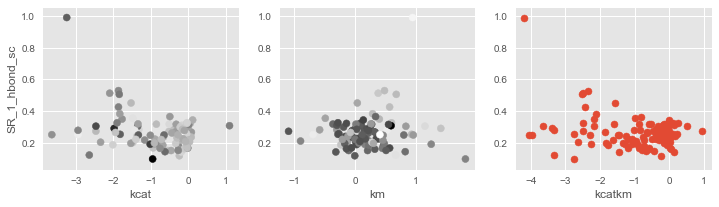

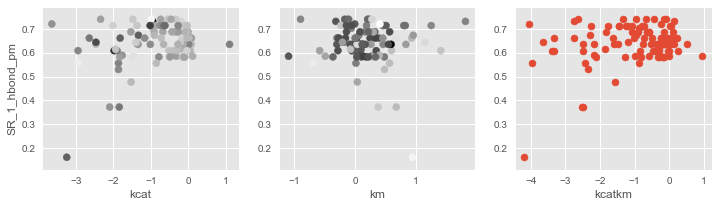

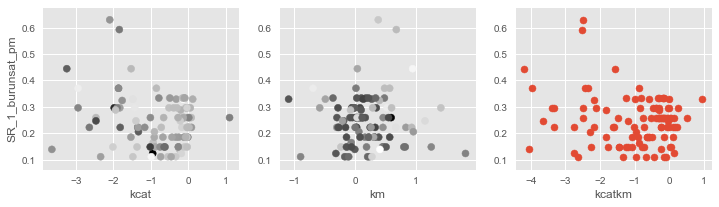

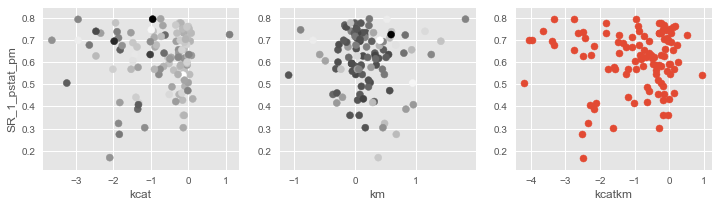

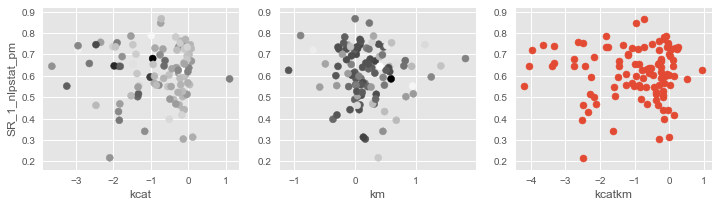

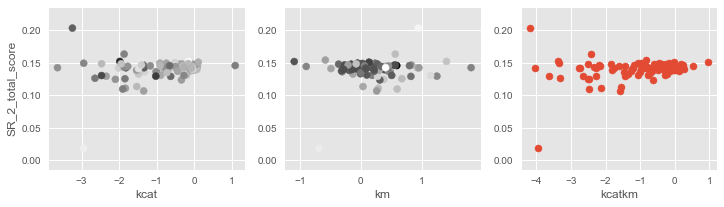

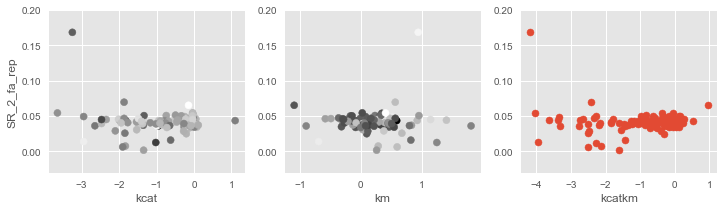

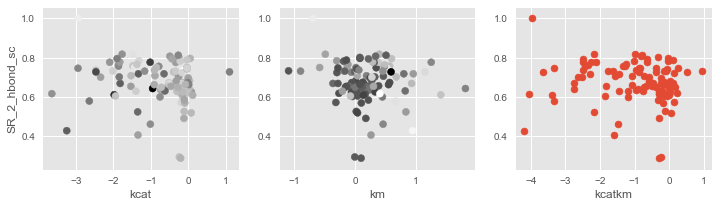

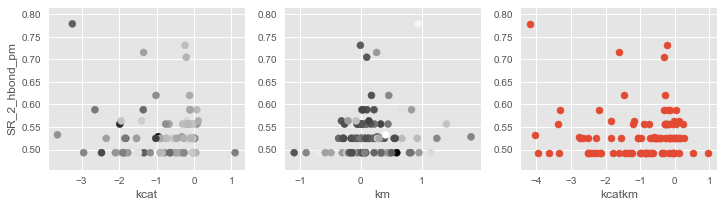

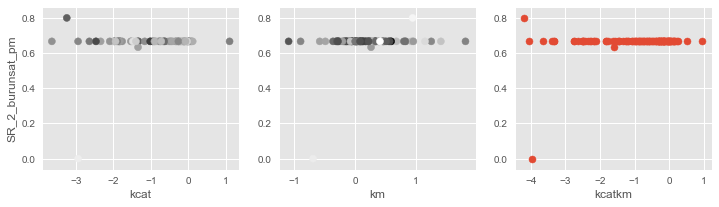

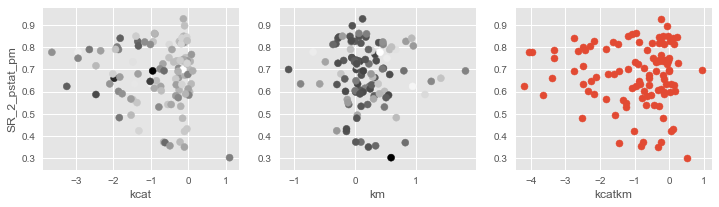

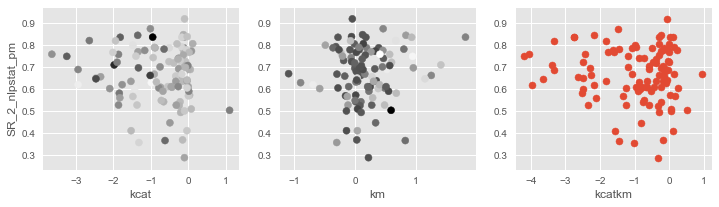

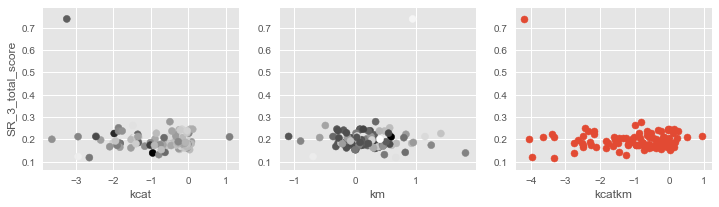

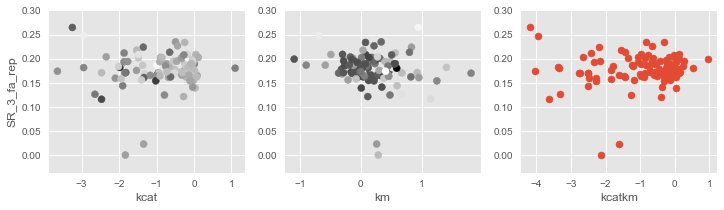

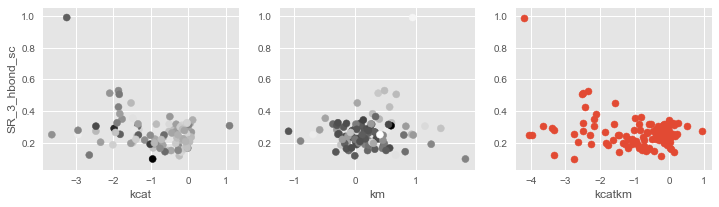

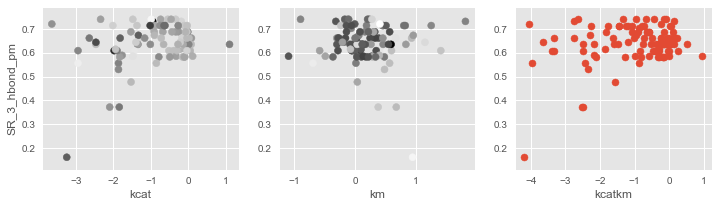

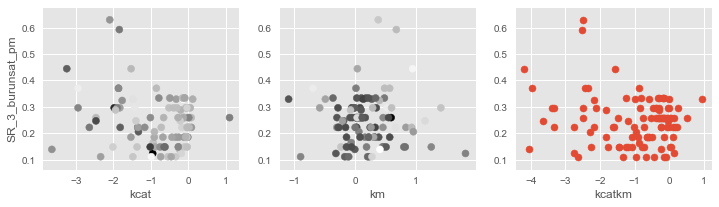

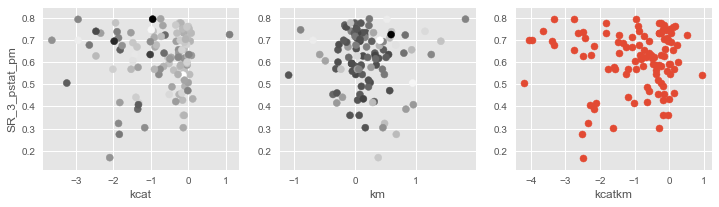

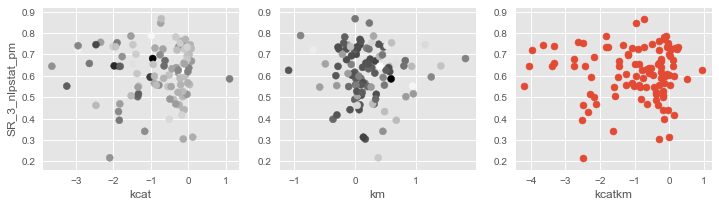

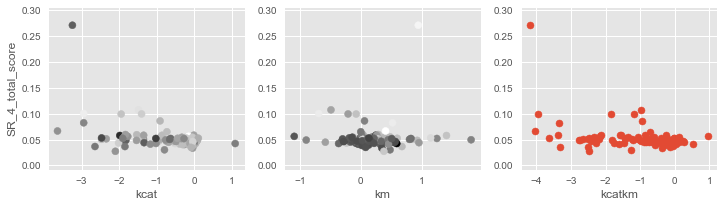

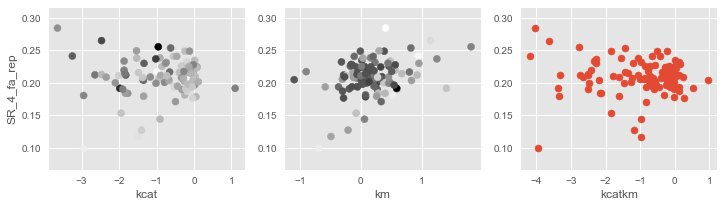

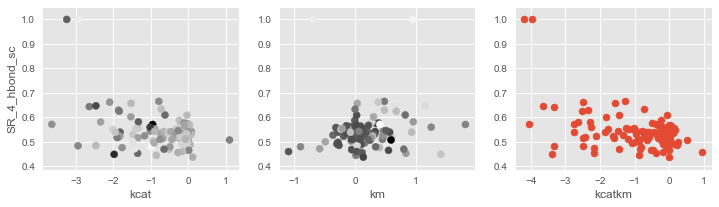

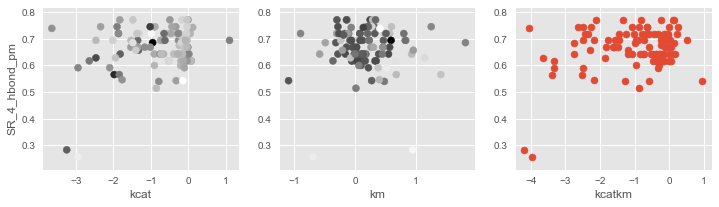

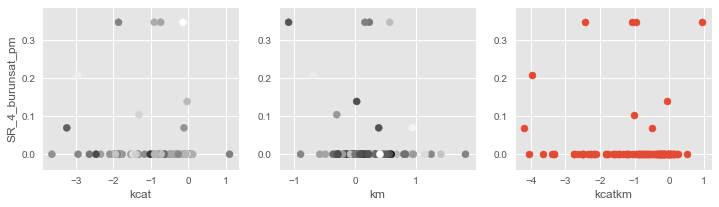

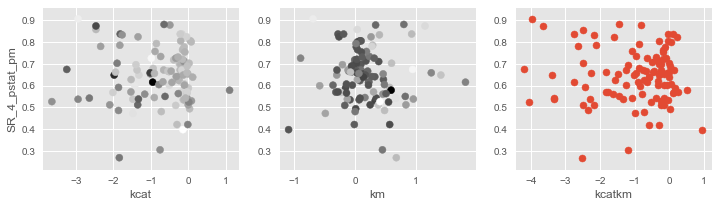

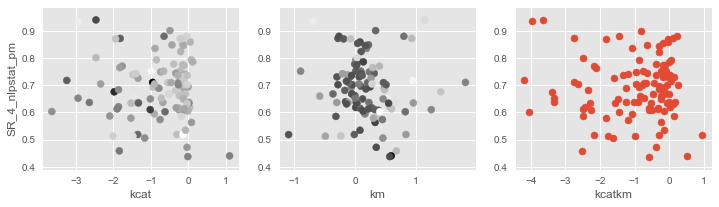

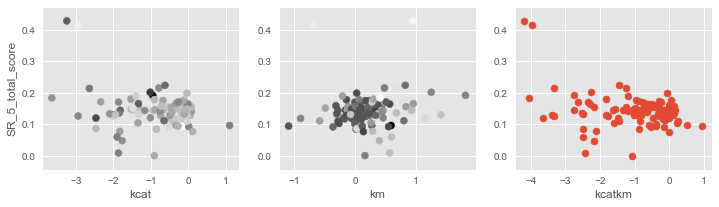

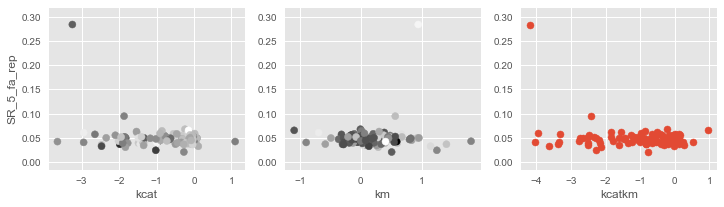

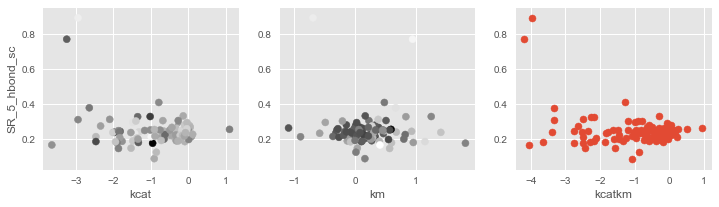

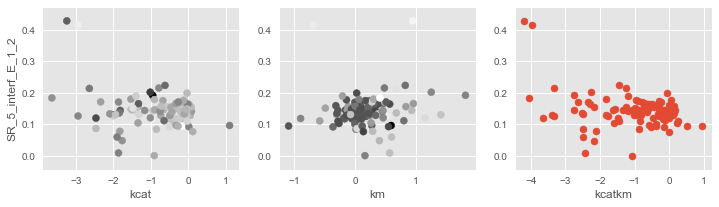

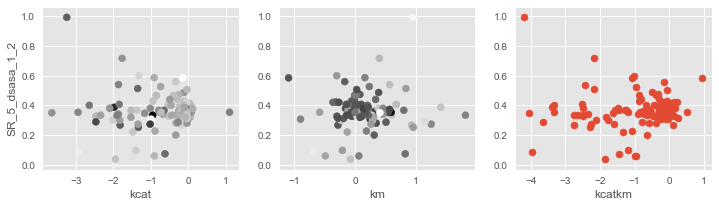

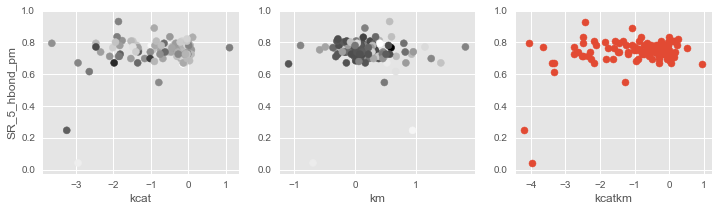

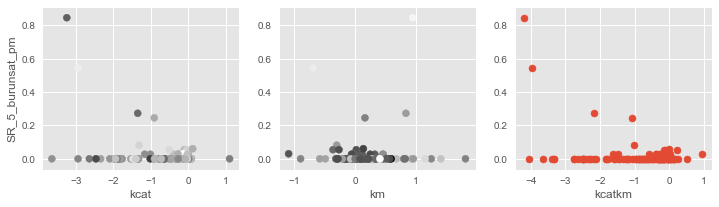

In [12]:
for col in df:
    plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.scatter(df.kcat, df[col], c=df.km)
    plt.ylabel(col)
    plt.xlabel('kcat')
    plt.subplot(132)
    plt.scatter(df.km, df[col], c=df.kcat)
    plt.xlabel('km')
    plt.subplot(133)
    plt.scatter(df.kcatkm, df[col])
    plt.xlabel('kcatkm')
    plt.show()

In [21]:
df.head()

,kcat,km,kcatkm,total_score,fa_rep,hbond_sc,tot_pstat_pm,tot_nlpstat_pm,tot_burunsat_pm,tot_hbond_pm,...,SR_4_burunsat_pm,SR_4_pstat_pm,SR_4_nlpstat_pm,SR_5_total_score,SR_5_fa_rep,SR_5_hbond_sc,SR_5_interf_E_1_2,SR_5_dsasa_1_2,SR_5_hbond_pm,SR_5_burunsat_pm
A192S,0.031408,0.007748,0.028609,0.014000,0.015057,0.220448,0.521739,0.605263,0.430962,0.838636,...,0.0,0.493573,0.618421,0.158190,0.047331,0.274970,0.158239,0.413333,0.684932,0.0
C167A,-0.264147,0.464191,-0.723565,0.006535,0.013690,0.185098,0.478261,0.500000,0.263598,0.807955,...,0.0,0.627249,0.710526,0.166865,0.045118,0.229242,0.166702,0.340000,0.726027,0.0
C167Q,-0.242052,-0.007005,-0.230186,0.007818,0.014864,0.117746,0.576087,0.611842,0.346234,0.901278,...,0.0,0.699871,0.662500,0.169821,0.067762,0.194043,0.169732,0.391667,0.743151,0.0
C167S,-0.953700,1.814514,-2.763251,0.006806,0.013739,0.127905,0.545894,0.564327,0.298001,0.852273,...,0.0,0.615253,0.711111,0.192181,0.042886,0.174321,0.192100,0.333333,0.771689,0.0
D322A,-0.941022,-0.065502,-0.870557,0.006223,0.014003,0.166179,0.642512,0.593567,0.265458,0.846591,...,0.0,0.678092,0.693567,0.143893,0.046007,0.240172,0.143856,0.429630,0.756469,0.0


In [22]:
X = df.ix[:, 3:]
y = df.ix[:, 0] # kcat 

X.shape, y.shape

((106, 44), (106,))

/Users/alex/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:986: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


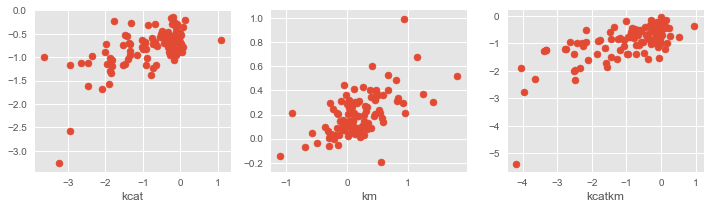

In [27]:
pred_list = []
plt.figure(figsize=(12,3))
for i, target in enumerate(targets,1):

    y = df[target]
    
    net = linear_model.ElasticNetCV(cv=10, max_iter=1e9, n_alphas=1000, eps=0.01, l1_ratio=[0.5,0.9,0.99])
    clf = ensemble.BaggingRegressor(net, oob_score=True, n_jobs=-1)
    clf.fit(X, y)
    pred = clf.predict(X)
    
    plt.subplot(1,3,i)
    plt.scatter(y, pred)
    plt.xlabel(target) 
    
    pred_list.append((y, pred))
    
#     pca = decomposition.PCA(n_components=2)
#     pca.fit(X)
#     X_after_pca = pca.transform(X)

#     tsne = manifold.TSNE()
#     X_after_tsne = tsne.fit_transform(X)

#     plt.figure(figsize=(12,3))
#     plt.subplot(131)
#     plt.plot(pca.explained_variance_)

#     plt.subplot(132)
#     plt.scatter(*X_after_pca.T, c=y)

#     plt.subplot(133)

#     plt.scatter(*X_after_tsne.T, c=y)

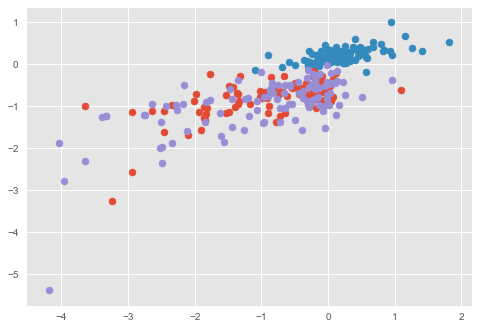

In [30]:
for x, y in pred_list:
    plt.scatter(x, y)

/Users/alex/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1661: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  y = y[not_na]
/Users/alex/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/Users/alex/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/alex/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3029: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


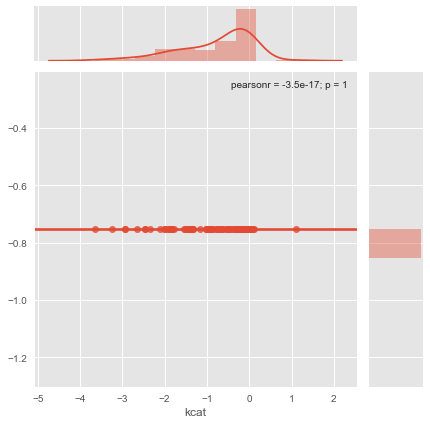

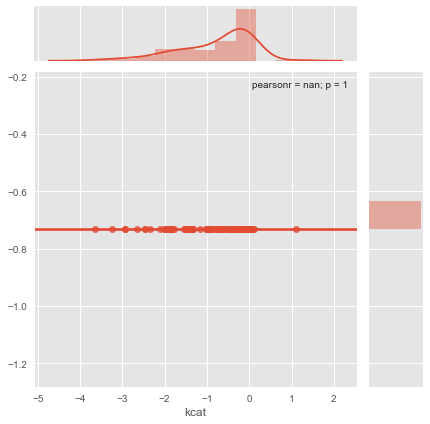

In [26]:
plt.figure(figsize=(12,3))
for i, target in enumerate(targets,1):

    y = df[target]
    
    net = linear_model.ElasticNetCV(cv=10, max_iter=1e9, n_alphas=1000, eps=0.01, l1_ratio=[0.5,0.9,0.99])
    clf = ensemble.BaggingRegressor(net, oob_score=True, n_jobs=-1)
    clf.fit(X, y)
    pred = clf.predict(X)
    oob = clf.oob_prediction_
    
    #plt.subplot(1,3,i)
    #plt.scatter(y, pred)
    plt.scatter(y, pred)
    plt.scatter(y, oob)
    break
#     plt.xlabel(target) 
    
#     pca = decomposition.PCA(n_components=2)
#     pca.fit(X)
#     X_after_pca = pca.transform(X)

#     tsne = manifold.TSNE()
#     X_after_tsne = tsne.fit_transform(X)

#     plt.figure(figsize=(12,3))
#     plt.subplot(131)
#     plt.plot(pca.explained_variance_)

#     plt.subplot(132)
#     plt.scatter(*X_after_pca.T, c=y)

#     plt.subplot(133)

#     plt.scatter(*X_after_tsne.T, c=y)

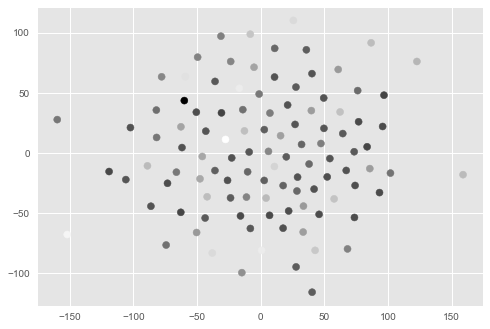

In [36]:
y = df['kcat']
tsne = manifold.TSNE()
X_ = tsne.fit_transform(X)
plt.scatter(*X_.T, c=y)

(-3, 1)

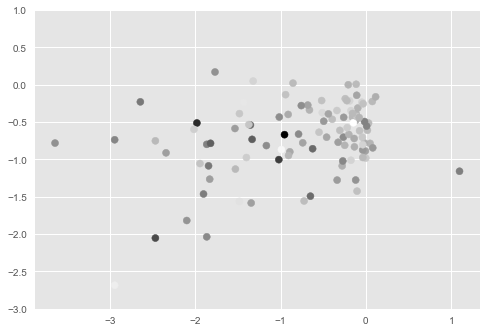

In [35]:
y = df['kcat']

net = linear_model.ElasticNetCV(cv=10, max_iter=1e9, n_alphas=1000, eps=0.01, l1_ratio=[0.5,0.9,0.99])
clf = ensemble.BaggingRegressor(net, oob_score=True, n_jobs=-1)

clf.fit(X, y)
oob = clf.oob_prediction_

#plt.scatter(y, pred)
plt.scatter(y, oob, c=df['km'])
plt.ylim((-3, 1))

In [37]:
preds = clf.predict(U_known_pos)

In [ ]:
#plt.scatter(y, pred)
plt.scatter(y, oob, c=df['km'])
plt.scatter
plt.ylim((-3, 1))

/Users/alex/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:986: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


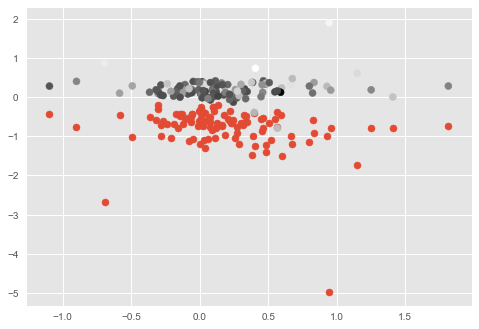

In [34]:
y = df['km']

net = linear_model.ElasticNetCV(cv=10, max_iter=1e9, n_alphas=1000, eps=0.01, l1_ratio=[0.5,0.9,0.99])
clf = ensemble.BaggingRegressor(net, oob_score=True, n_jobs=-1)

clf.fit(X, y)
oob = clf.oob_prediction_

plt.scatter(y, pred)
plt.scatter(y, oob, c=df['kcat'])